<a href="https://colab.research.google.com/github/Snupix031/Vid/blob/main/filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import data, img_as_float
from skimage.util import random_noise
import skimage.io

import skimage.filters

from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from scipy.io import loadmat

file_path = "drive/MyDrive/rit18_data.mat"

dataset = loadmat(file_path)

#Load Training Data and Labels
train_data = dataset['train_data']
train_mask = train_data[-1]
train_data = train_data[:6]
train_labels = dataset['train_labels']

#Load Validation Data and Labels
val_data = dataset['val_data']
val_mask = val_data[-1]
val_data = val_data[:6]
val_labels = dataset['val_labels']

#Load Test Data
test_data = dataset['test_data']
test_mask = test_data[1]
test_data = test_data[:6]

band_centers = dataset['band_centers'][0]
band_center_units = dataset['band_center_units']
classes = dataset['classes']                          

#Print some info about the dataset
print(dataset['sensor'][0])
print(dataset['info'][0])

Tetracam Micro-MCA
http://www.tetracam.com/Products-Micro_MCA.htm
Authors: Ronald Kemker, Carl Salvaggio, and Christopher Kanan
Organization: Carlson Center for Imaging Science, Rochester Institute of Technology
Website: http://www.cis.rit.edu/~rmk6217/
Paper: https://arxiv.org/abs/1703.01918


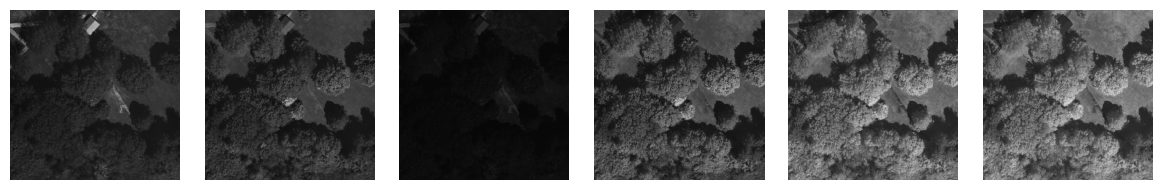

In [3]:
#ORIGINAL
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  plt.subplot(1,6,i+1)
  plt.imshow(image[i],cmap='gray')
  plt.axis('off')
  plt.tight_layout()


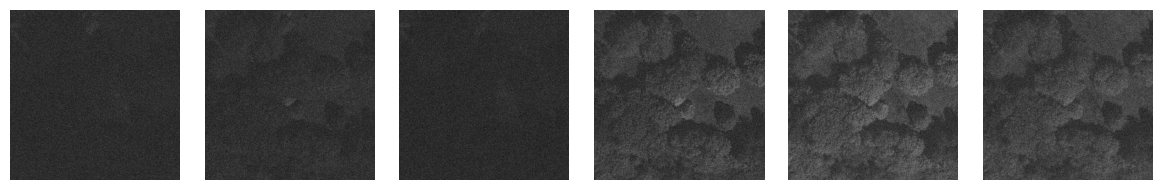

In [4]:
#salt & pepper noise
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  original=img_as_float(image[i])
  sigma = 0.155
  noisy3 = random_noise(original, var=sigma**1)

  plt.subplot(1,6,i+1)
  plt.imshow(noisy3,cmap='gray')
  plt.axis('off')
  plt.tight_layout()

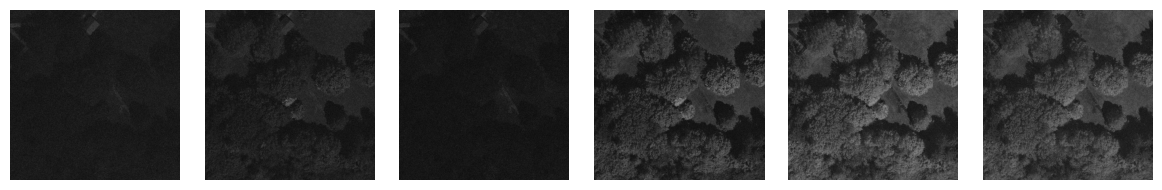

In [5]:
#gaussian noise 
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  original=img_as_float(image[i])

  noisy3 = random_noise(original, mode='gaussian')

  plt.subplot(1,6,i+1)
  plt.imshow(noisy3,cmap='gray')
  plt.axis('off')
  plt.tight_layout()

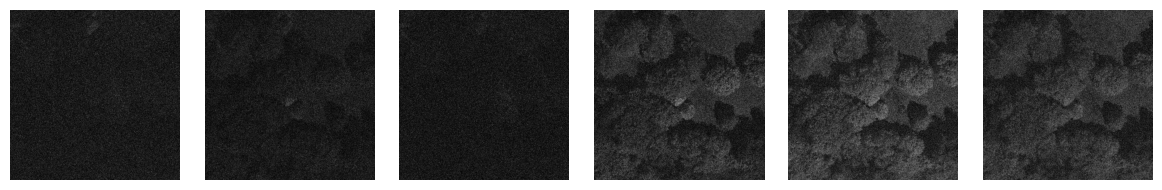

In [6]:
# MEDIAN FILTER (S&P)
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  original=img_as_float(image[i])
  sigma = 0.155
  noisy3 = random_noise(original, var=sigma**1)
  denoised_image_tv = skimage.filters.median(noisy3)

  plt.subplot(1,6,i+1)
  plt.imshow(denoised_image_tv,cmap='gray')
  plt.axis('off')
  plt.tight_layout()

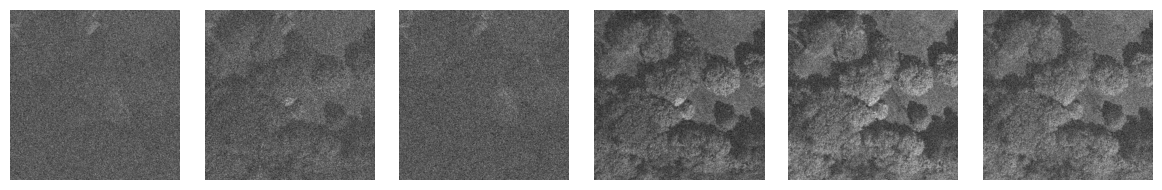

In [7]:
# GAUSSAIN FILTER (S&P)
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  original=img_as_float(image[i])
  sigma = 0.155
  noisy3 = random_noise(original, var=sigma**1)
  denoised_image_tv = skimage.filters.gaussian(noisy3,2)

  plt.subplot(1,6,i+1)
  plt.imshow(denoised_image_tv,cmap='gray')
  plt.axis('off')
  plt.tight_layout()

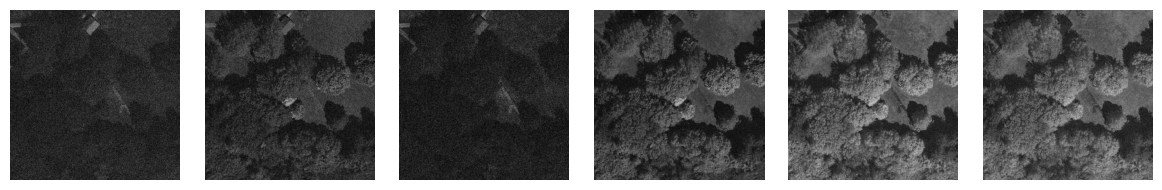

In [8]:
# MEDIAN FILTER (GAUSSIAN)
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  original=img_as_float(image[i])
  sigma = 0.155
  noisy3 = random_noise(original, mode='gaussian')
  denoised_image_tv = skimage.filters.median(noisy3)

  plt.subplot(1,6,i+1)
  plt.imshow(denoised_image_tv,cmap='gray')
  plt.axis('off')
  plt.tight_layout()

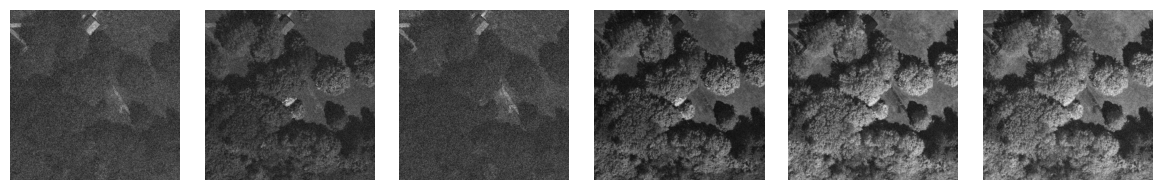

In [9]:
# GAUSSAIN FILTER (GAUSSIAN)
image=test_data[:,6000:8000,4000:6000]
fig=plt.figure(figsize=(12,2))
for i in range(image.shape[0]):
  original=img_as_float(image[i])
  sigma = 0.155
  noisy3 = random_noise(original, mode='gaussian')
  denoised_image_tv = skimage.filters.gaussian(noisy3,2)

  plt.subplot(1,6,i+1)
  plt.imshow(denoised_image_tv,cmap='gray')
  plt.axis('off')
  plt.tight_layout()